# Boston Housing Prices
This is the beginner level machine learning project. We explore Regression algorithm for this project. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town. 

In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from houses in Boston’s suburbs. Once we get a good fit, we will use this model to predict the monetary value of a house located at the Boston’s area.

A model like this would be very valuable for a real state agent who could make use of the information provided in a daily basis.

### Dataset
This data was collected in 1978. It has 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

Following are the features summary:

1. CRIM: Per capita crime by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollers
11. PTRATIO: Pupil-teacher ratio by town
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

In [1]:
#Import Pandasfor datamanipulations and analysis
#Import numpy for numeric calculation
import pandas as pd
import numpy as np

In [2]:
#Read Boston Housing CSV file
housing = pd.read_csv("BostonHousing.csv")

In [3]:
#Check the head of dataframe
housing.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
#Check the info of dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#Check descriptive statistical summary
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

In [6]:
#import seaborn and matplotlib library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

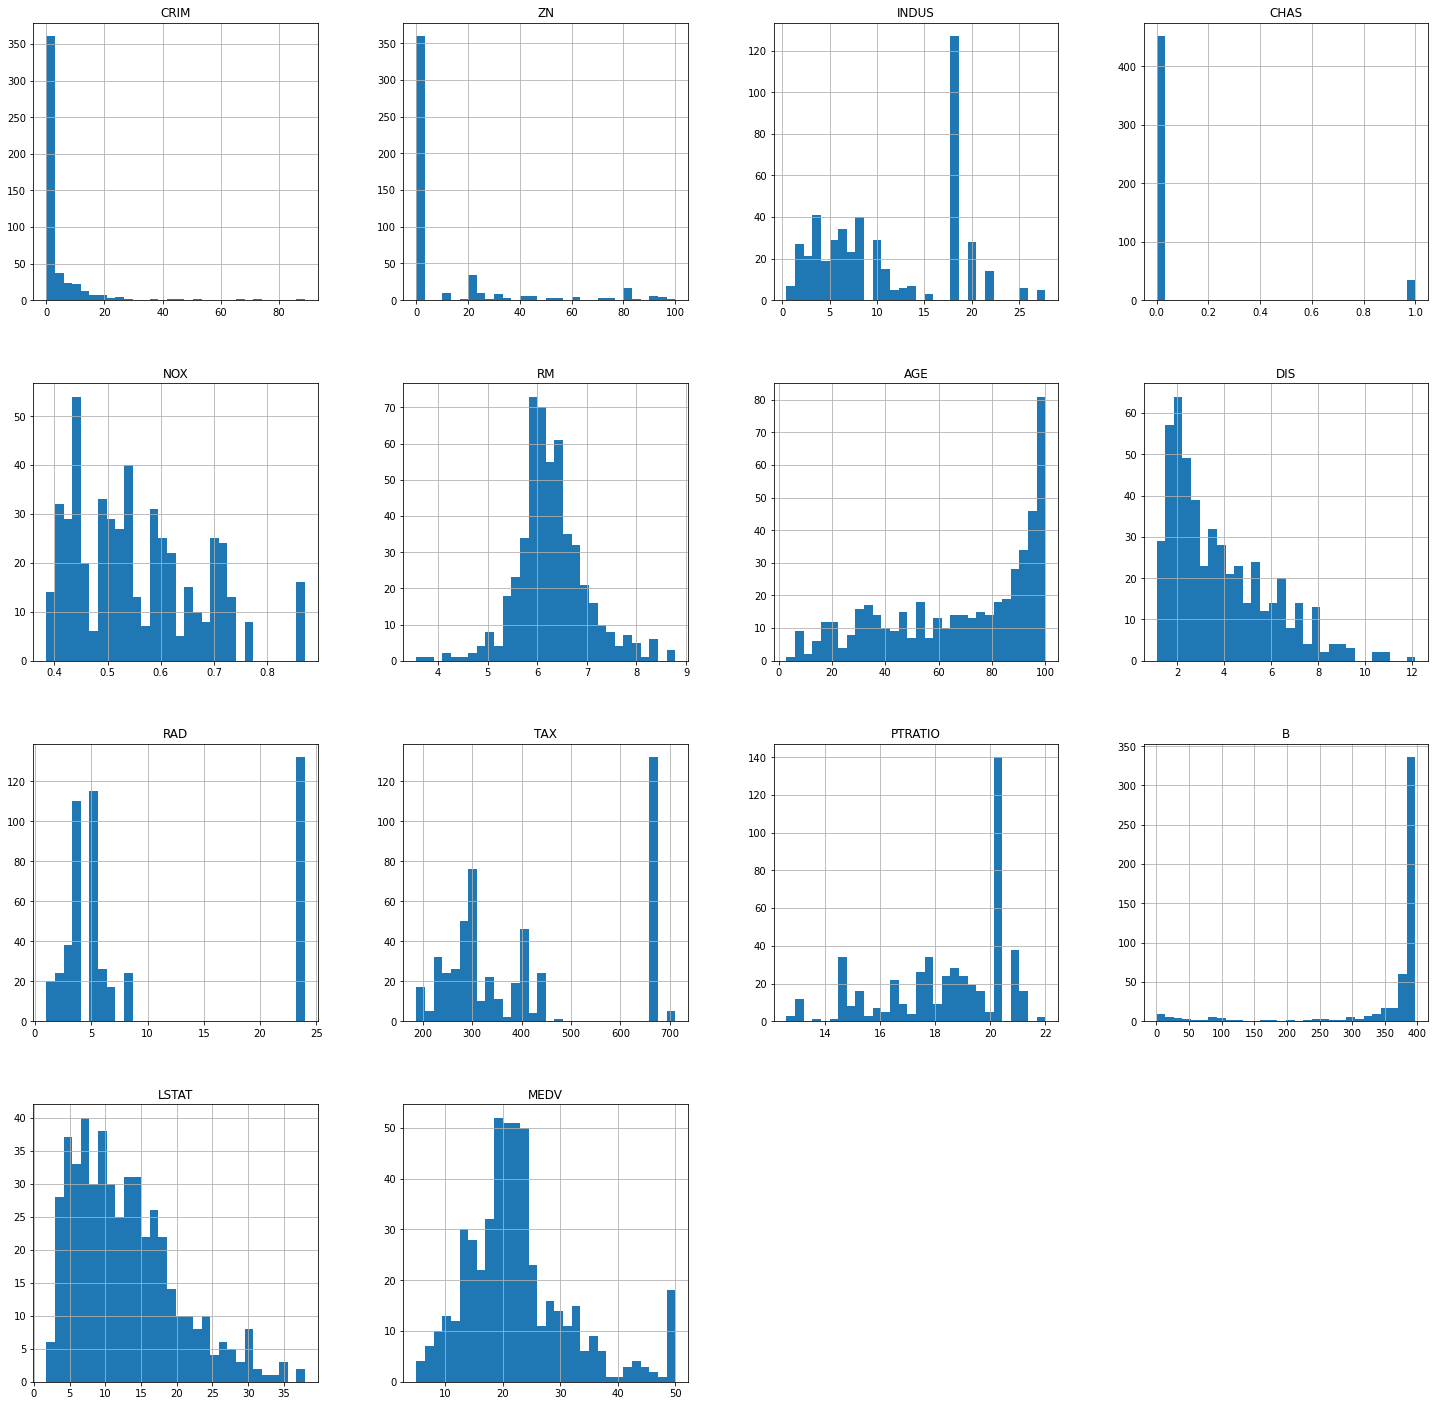

In [7]:
#Check the features information visually using histogram
housing.hist(bins = 30, figsize = (25,25))

We will use correlation to find the most important features that influence our Median value of house. 

In [8]:
#Check the corelational matrix
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


<AxesSubplot:>

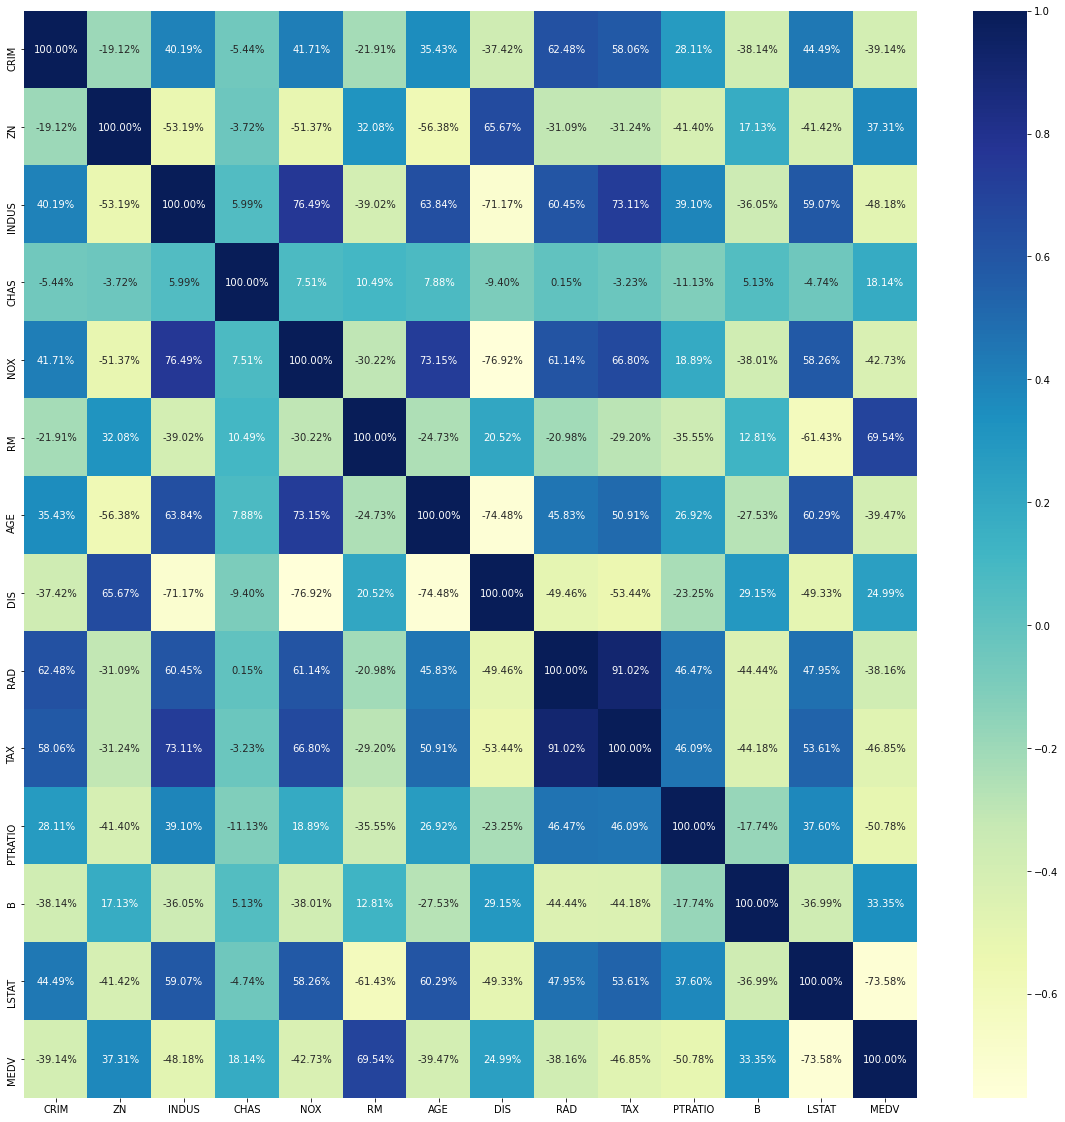

In [9]:
#Check the corelational matrix visually using heatmap 
housing_corr = housing.corr()
plt.figure(figsize=(20,20))
sns.heatmap(housing_corr,annot=True,fmt='.2%',cmap='YlGnBu')

In [10]:
#Correlational values of all the features wrt 'MEDV' 
housing_corr["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

In [11]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Feature Engineering

'MEDV'is highy corelated with'LSTAT' and'RM. Where as these features are corelated with 'TAX' and 'AGE'. So, Lets checkout if "Tax per Room", "Tax per LSTAT" makes any sense. 

In [12]:
#Create two new features TXPRM (Tax per room) and TXLSTAT (Tax per LSTAT) and check the columns 
housing['TXPRM'] = housing['TAX']/housing['RM']
housing['TXLSTAT'] = housing['TAX']/housing['LSTAT']

In [13]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'TXPRM', 'TXLSTAT'],
      dtype='object')

In [14]:
#Correlational values of all the features wrt 'MEDV' 
housing_corr = housing.corr()
housing_corr["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
TXLSTAT    0.608638
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
TXPRM     -0.537650
LSTAT     -0.735822
Name: MEDV, dtype: float64

In [15]:
#Visualisation of derived features wrt MEDV
#Set the style whitegrid for seaborn 
sns.set(style = "whitegrid")

<AxesSubplot:title={'center':'Tax per LSTAT'}, xlabel='TXLSTAT', ylabel='MEDV'>

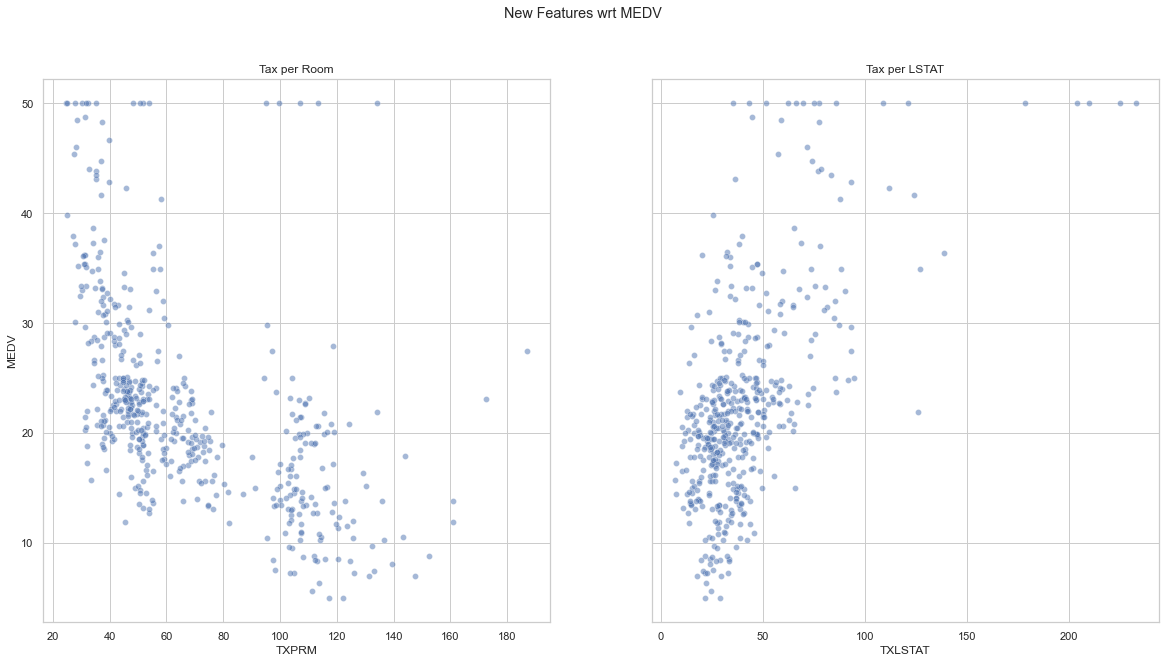

In [16]:
#Draw subplot for TXPRM and TXLSTAT wrt MEDV
fig, ax = plt.subplots(1,2,sharey=True,figsize=(20,10))
fig.suptitle('New Features wrt MEDV')
ax[0].set_title('Tax per Room')
sns.scatterplot(ax=ax[0],data=housing, x='TXPRM',y='MEDV',alpha=0.5)

ax[1].set_title('Tax per LSTAT')
sns.scatterplot(ax=ax[1],data=housing, x='TXLSTAT',y='MEDV',alpha=0.5)

### Select required features

In [17]:
#define function to get the features based on threshold value calculated from the correlational matrix
def get_features(corr_data,corr_threshold):
    _cols = []
    for index, value in corr_data.abs().items(): 
        if value > corr_threshold:
            _cols.append(index)
    return _cols

In [18]:
#Apply function to get the features based on threshold value calculated from the correlational matrix

selected_fetures = get_features(housing_corr.MEDV,0.45)

In [19]:
#Build dataframe with selected features/columns
housing = housing[selected_fetures].copy()
housing.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV,TXPRM,TXLSTAT
0,2.31,6.575,296,15.3,4.98,24.0,45.019011,59.437751
1,7.07,6.421,242,17.8,9.14,21.6,37.688834,26.477024
2,7.07,7.185,242,17.8,4.03,34.7,33.681280,60.049628
3,2.18,6.998,222,18.7,2.94,33.4,31.723350,75.510204
4,2.18,7.147,222,18.7,NaN,36.2,31.061984,NaN


<AxesSubplot:>

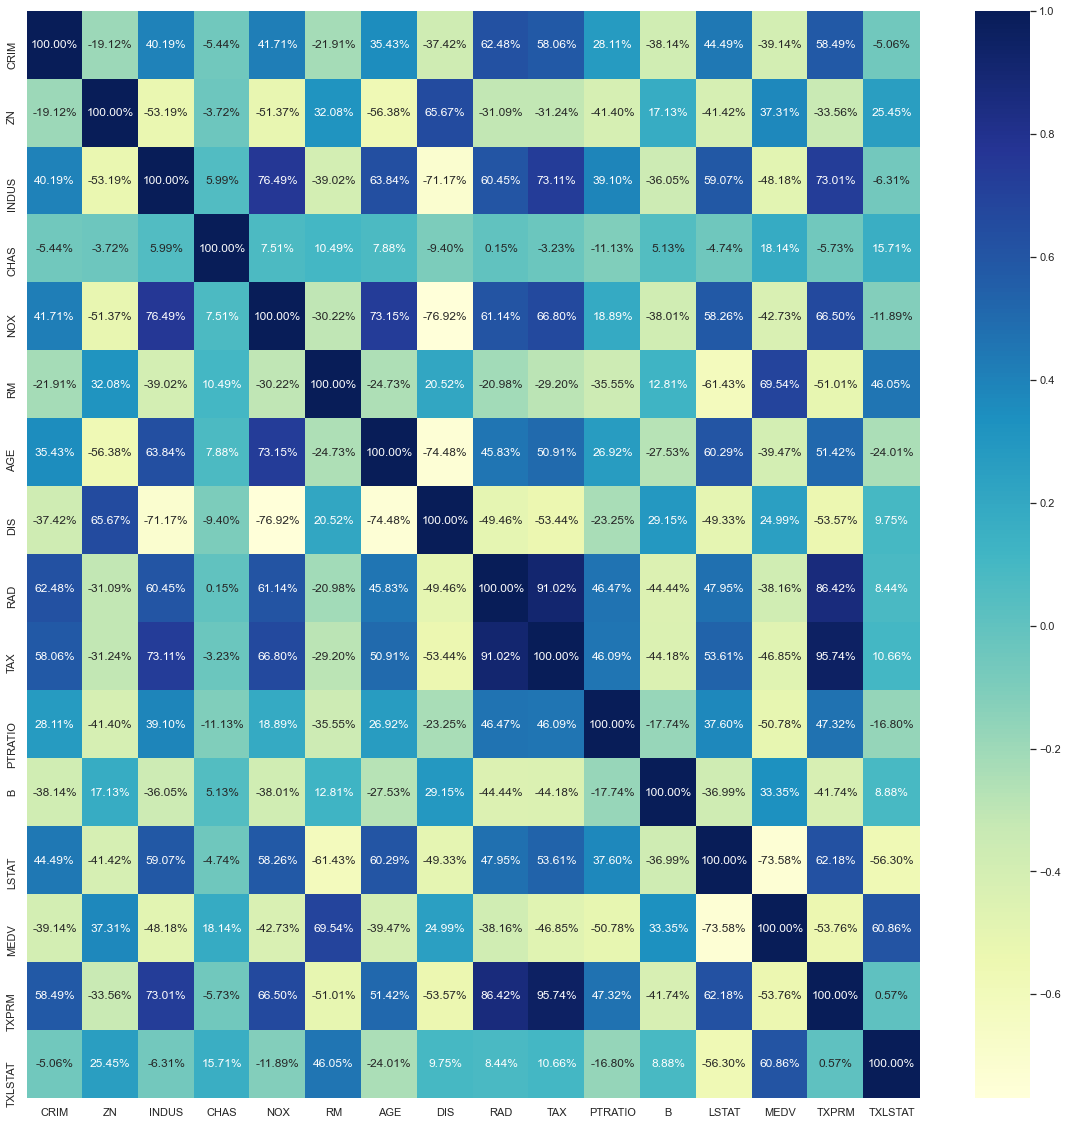

In [20]:
#Plot heatmap for the selected features
plt.figure(figsize=(20,20))
sns.heatmap(housing_corr,annot=True,fmt='.2%',cmap='YlGnBu')

### Bulding model

**Train Test Split**

In [21]:
#Target

#Features

y = housing["MEDV"]
X = housing.drop("MEDV", axis = 1)

In [22]:
#Train test split using sklearn model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
#Get the shape of train and test dataset
print("X train:", X_train.shape , "\nX test: ",X_test.shape)

X train: (354, 7) 
X test:  (152, 7)


### Missing Value

**Mean or Median Imputation**

Mean or median imputation consists of replacing all occurrences of missing values (NA) within a variable with the mean or median of that variable.

* If the variable follows a normal distribution, the mean and median are approximately the same.
* If the variable has a skewed distribution, then the median is a better representation.
* Use this method when data is missing at random, and no more than 5% of the variable contains missing data.
* The mean or median value should be calculated only in the train set and used to replace missing values in both train and test sets. Meaning apply fit method only for training data. Whereas, transfrom for both train and test data. 

In [24]:
#Sklearn imputer to replace missing values with the median value of that perticular feature/Column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "median")

In [25]:
# fit the imputer to the train data
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [26]:
# apply the transformation to the train and test
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [27]:
#Create transfromed housing "housing_tr" dataframe
housing_tr = pd.DataFrame(X_train,columns=X.columns)

In [28]:
housing_tr.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,TXPRM,TXLSTAT
0,2.68,8.034,224.0,14.7,2.88,27.881504,77.777778
1,18.10,7.016,666.0,20.2,2.96,94.925884,225.000000
2,18.10,6.312,666.0,20.2,10.58,105.513308,62.948960
3,4.49,6.015,247.0,18.5,12.86,41.064007,19.206843
4,4.93,6.095,300.0,16.6,12.40,49.220673,24.193548


### Feature Scaling

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1

where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:
                            
                            z=(x−μ)/σ

Standardizing the features so that they are centered around 0 with a standard deviation of 1. 

In [29]:
#Import StandardScaler from sklearn preprocessing module to use z-score normalization for feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**Build Scaled Model**

In [30]:
#Fit and transfrom train dataset where as transfrom test dataset
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
#Check the scaled dataframe 
X_train

array([[-1.30041847,  2.63929529, -1.10188422, ..., -1.51141308,
        -1.26335499,  1.48619527],
       [ 0.98995206,  1.12903832,  1.47481647, ..., -1.49956785,
         0.86580438,  7.12400943],
       [ 0.98995206,  0.084617  ,  1.47481647, ..., -0.37130953,
         1.20203411,  0.91833184],
       ...,
       [-0.92760199, -0.5340246 , -1.10188422, ..., -0.37427084,
        -0.9420711 , -0.67996317],
       [-0.529535  , -0.36489956, -0.59470557, ...,  0.02698638,
        -0.50517111, -0.5947883 ],
       [-1.4474656 ,  0.48072566, -0.01174162, ..., -1.1249624 ,
        -0.16486448,  1.37458992]])

In [34]:
df = pd.DataFrame(X_train, columns = housing_tr.columns)
df.describe()

,INDUS,RM,TAX,PTRATIO,LSTAT,TXPRM,TXLSTAT
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,6.146998e-17,-3.841873e-16,4.865556e-17,7.029060e-16,3.192675e-16,2.073828e-16,-3.700743e-17
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-1.512820e+00,-3.548604e+00,-1.317581e+00,-2.729899e+00,-1.653556e+00,-1.359465e+00,-1.228172e+00
25%,-9.082928e-01,-5.573906e-01,-7.812540e-01,-5.094958e-01,-7.929257e-01,-7.326172e-01,-5.180485e-01
50%,-2.280141e-01,-1.037942e-01,-4.489646e-01,2.768971e-01,-9.960953e-02,-4.383819e-01,-2.120456e-01
75%,9.899521e-01,4.792421e-01,1.474816e+00,7.857395e-01,6.025906e-01,1.004348e+00,2.015456e-01
max,2.421805e+00,3.633276e+00,1.737150e+00,1.618391e+00,3.537617e+00,3.326340e+00,7.124009e+00


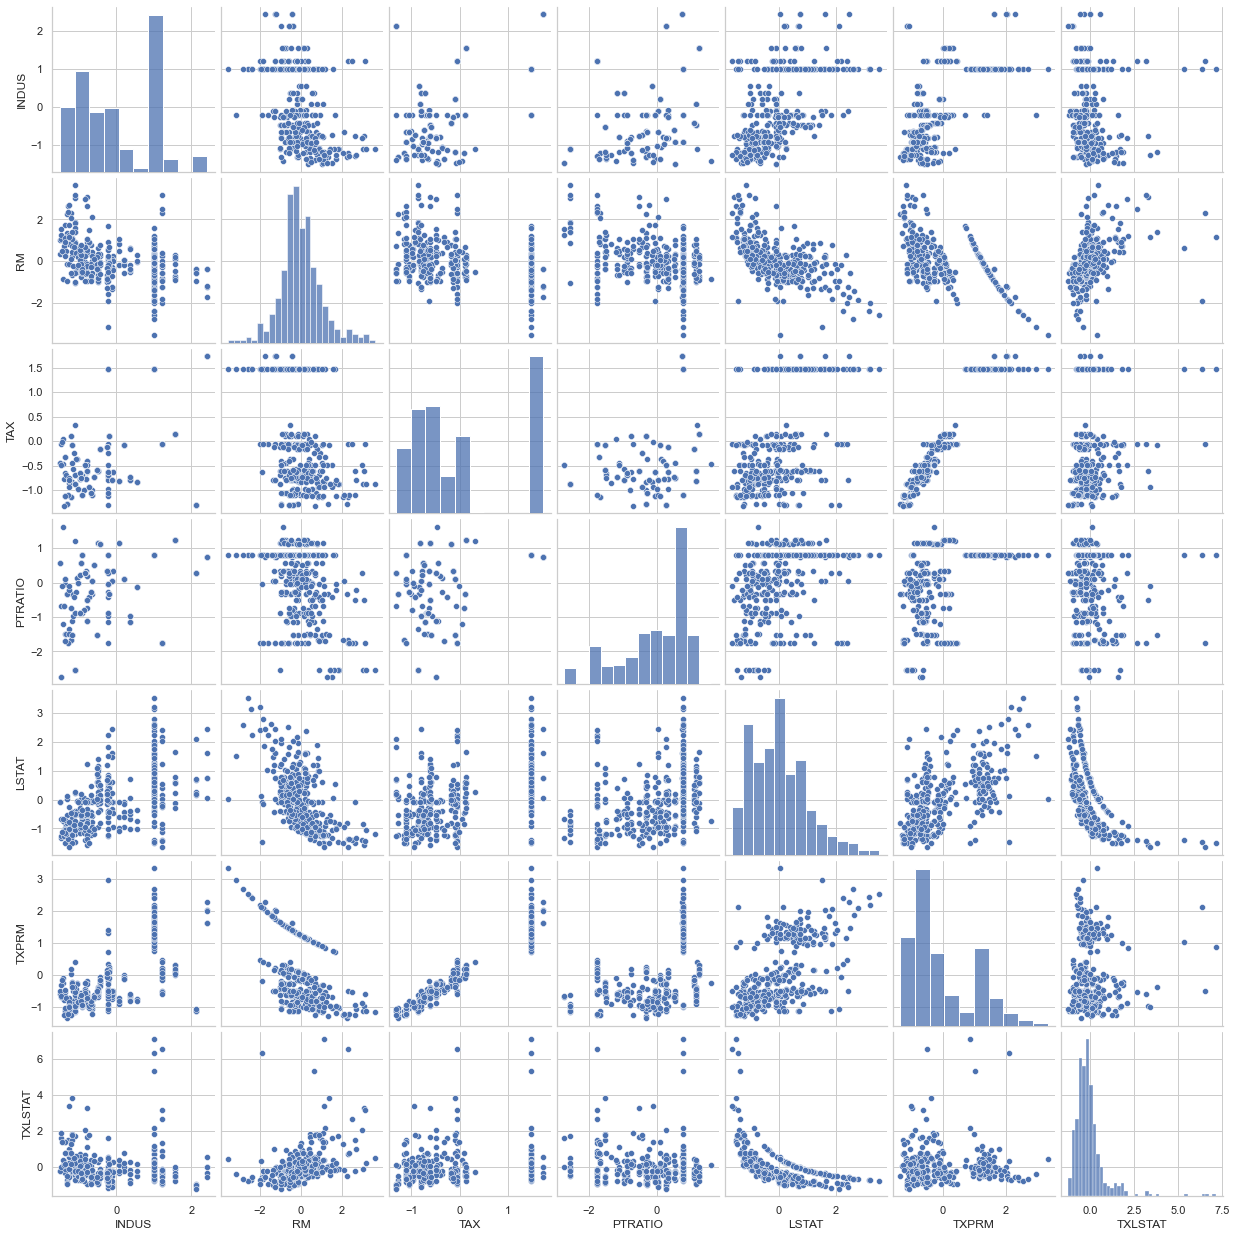

In [35]:
sns.pairplot(data = df)

## Model Selection

In [41]:
#Select LinearRegression using sklearn linear model
#Fit the model using X_train and y_train
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [42]:
print("Accuracy : %.2f" %(model.score(X_train, y_train) * 100))

Accuracy : 81.78


In [43]:
#Check the model intercept 
model.intercept_

21.97683615819209

In [44]:
#Check the coefficient for each feature
model.coef_

array([  0.34814377,   5.88189003, -14.81819366,  -1.13021752,
        -0.90919815,  13.09394919,   3.66989802])

In [46]:
#Check the coefficient for each feature in a dataframe format
df_coef = pd.DataFrame(model.coef_,X.columns,columns=['Coeffiecient'])
df_coef

,Coeffiecient
INDUS,0.348144
RM,5.881890
TAX,-14.818194
PTRATIO,-1.130218
LSTAT,-0.909198
TXPRM,13.093949
TXLSTAT,3.669898


### Model Evaluation

In [47]:
#Evaluate the model using mean_squared_error from sklearn metrices module
from sklearn.metrics import mean_squared_error

In [48]:
#Get the predicted value for the target "MEDV"
#Calculate rmse value
y_prediction = model.predict(X_test)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)
rmse

5.341546739193117

In [ ]:
#Check the shape for y_predict and y_test if it matches. 

In [49]:
#Check r2_score form skelearn metrices module
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.7125521229094346

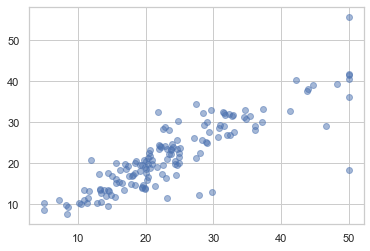

In [54]:
#Check the pattern formed by the actual and predicted target values
plt.scatter(y_test, y_prediction, alpha = 0.5)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

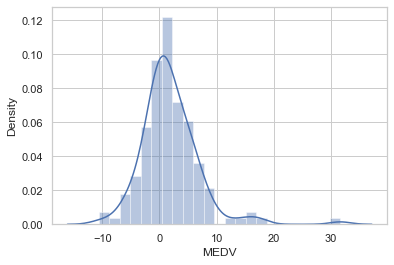

In [55]:
sns.distplot(y_test - y_prediction)

### Cross Validation

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

Get X and y value before train, test split. Since we are going to apply CV on original datafram, after feature engineering and feature scaling.

In [56]:
#check train and test shape before combinening. They must have equal number of rows. 
X_train.shape

(354, 7)

In [57]:
y_train.shape

(354,)

In [58]:
#Create a dataframe for both train and test dataset and  combine them using pd.concat(). 
#Makesure the total datapoints are 506

df_train = pd.DataFrame(X_train,columns=housing_tr.columns)
df_test = pd.DataFrame(X_test,columns=housing_tr.columns)
df.head()

X_new = pd.concat([df_train,df_test])
print(X_new.shape)

df_y_train = pd.Series(y_train)
df_y_test = pd.Series(y_test)

y_new = pd.concat([df_y_train,df_y_test])
print(y_new.shape)

(506, 7)
(506,)


**Evaluate a score by cross-validation**

Estimating the accuracy of a linear regression on Boston housing by splitting the data, fitting a model and computing the score 10 consecutive times (with different splits each time):

For scoring refer the documentation on sklearn "The scoring parameter: defining model evaluation rule"

https://scikit-learn.org/stable/modules/model_evaluation.html

In [61]:
#Import cross_val_score from sklearn model selection and calculate scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_new, y_new, cv = 10)
print(scores.mean())

0.7663884685805628


**Accuracy of CV (The mean score) and the standard deviation**

In [65]:
#print Accuracy and standard deviation of the score from crass validation
print("Accuracy : ", scores.mean() * 100, "%\nStandard Deviation : ",scores.std())

Accuracy :  76.63884685805627 %
Standard Deviation :  0.0875010641935879


**To find the rmse value, Lets change cross_val_score by using the scoring parameter to "neg_mean_squared_error'"**

In [66]:
#Calculate scores using "neg_mean_squared_erro" as scoring parameter
scores = cross_val_score(model, X_new,y_new,cv=10,scoring='neg_mean_squared_error')
print(scores)

[-13.01016815 -20.9135095  -10.44522107 -12.88631009  -8.29156493
 -17.60009688 -27.96487328 -41.87889892 -14.52569006 -22.60332581]


In [68]:
#Calculate the rmse value of all the scores
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[3.60696107 4.57312907 3.23190672 3.5897507  2.87950776 4.19524694
 5.28818242 6.4713908  3.81125833 4.75429551]


In [69]:
#Get the mean value of rsme_scores
rmse_scores.mean()

4.240162932305845